# mBuild Tutorial 01: Basic Functionality

This tutorial will cover the basic usage of mBuild's `Compound` class and the creation of static bonds between atoms.

As in the prior tutorial, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

### The `Compound` class

The base class of mBuild is the `Compound` class, which defines the primary building block used for constructing molecules. Molecules are constructed hierarchically; however, each level of the hierarchy inherits from the `Compound` class. This means that `Compounds` may contain other `Compounds`, and that the same methods and attributes are present for molecule components at any level of the hierarchy. There are several ways to interrogate what is contained within a `Compound` (e.g. `type`, `dir`, `list`). mBuild `Compounds` feature [a variety of useful methods and attributes](http://mosdef-hub.github.io/mbuild/data_structures.html) to facilitate system construction.

In [2]:
my_compound = mb.Compound()
dir(my_compound)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_intermol_molecule_type',
 '_charge',
 '_check_if_contains_rigid_bodies',
 '_clone',
 '_clone_bonds',
 '_contains_only_ports',
 '_contains_rigid',
 '_increment_rigid_ids',
 '_kick',
 '_n_particles',
 '_particles',
 '_periodicity',
 '_pos',
 '_remove_references',
 '_reorder_rigid_ids',
 '_rigid_id',
 '_to_topology',
 '_update_port_locations',
 'add',
 'add_bond',
 'all_ports',
 'ancestors',
 'available_ports',
 'bond_graph',
 'bonds',
 'boundingbox',
 'center',
 'charge',
 'children',
 'contains_rigid',
 'energy_minimization',
 'from_parmed',
 'from_trajectory',
 'generate_bonds',
 'label_rigid_bodies'

### Creating `Compounds`

There are several ways that `Compounds` can be created with mBuild. The simplest is to construct them from `Particles`. The `Particle` class is used to define `Compounds` residing at the lowest level of the containment hierarchy. Standard mBuild protocol is to define `Particle` names according to their elemental symbol (e.g. `'C'`), or to preface `Particle` names by an underscore for coarse-grained beads (e.g. `'_CH4'`). This aids in the atomtyping and forcefield application process (using the Foyer package) which will be addressed in later tutorials.

Now, lets create a simple carbon `Particle`. [Several arguments are available](http://mosdef-hub.github.io/mbuild/data_structures.html#mbuild.compound.Compound) to set various `Compound`/`Particle` attributes upon instantiation. Here, we'll use the `name` argument to specify the element of our `Particle` and the `pos` argument to specify the location of the `Particle` in Cartesian space.

**Important Note:** mBuild expects all distance units to be in nanometers.

In [3]:
carbon = mb.Particle(name='C', pos=[1.0, 2.0, 3.0])
print(carbon)

<C pos=( 1.0000, 2.0000, 3.0000), 0 bonds, id: 4704152376>


Now, we will create a simple CH2 moiety. (Don't worry about the undercoordinated carbon; we'll be using this later to piece together an alkane chain.)

The first step we need to take is to create an empty mBuild `Compound` to add our `Particles` to.

In [5]:
ch2 = mb.Compound()

Note, that we can provide a name to this compound (beyond just the variable name ch2), e.g.,:

In [10]:
ch2 = mb.Compound(name='ch2 compound')

Now we need to create three `Particles`: one carbon and two hydrogens. We'll manually set the atomic positions such that they are reasonably representative of realistic atomic spacings.

In [11]:
carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
hydrogen = mb.Particle(pos=[0.1, 0.0, 0.0], name='H')
hydrogen2 = mb.Particle(pos=[-0.1, 0.0, 0.0], name='H')

As described earlier, the hierarchical design approach used by mBuild allows `Compounds` to contain other `Compounds`. To add our three `Particles` to the hierarchy of our CH2 `Compound` we can use the `add` function. All we need to provide are the variable references to these three particles in a list-like format.

In [12]:
ch2.add([carbon, hydrogen, hydrogen2])

We can use the `particles` method to view the `Particles` contained by a `Compound`. This method is written as a generator to conserve memory for large systems, so we'll need to convert to a `list`.

In [13]:
list(ch2.particles())

[<C pos=( 0.0000, 0.0000, 0.0000), 0 bonds, id: 4704240808>,
 <H pos=( 0.1000, 0.0000, 0.0000), 0 bonds, id: 4704240752>,
 <H pos=(-0.1000, 0.0000, 0.0000), 0 bonds, id: 4704240920>]

As we can see, our carbon `Particle` and two hydrogen `Particles` are now contained within our CH2 `Compound`. Now let's visualize our `Compound` to confirm we built this correctly.

**Note:** For the purposes of these tutorials we are using a local `visualize` routine that utilizes `matplotlib` to view our molecules. mBuild also contains a `Compound.visualize()` routine that uses the `NGLview` package for molecule visualization; however, this routine is currently under construction.

<IPython.core.display.Javascript object>


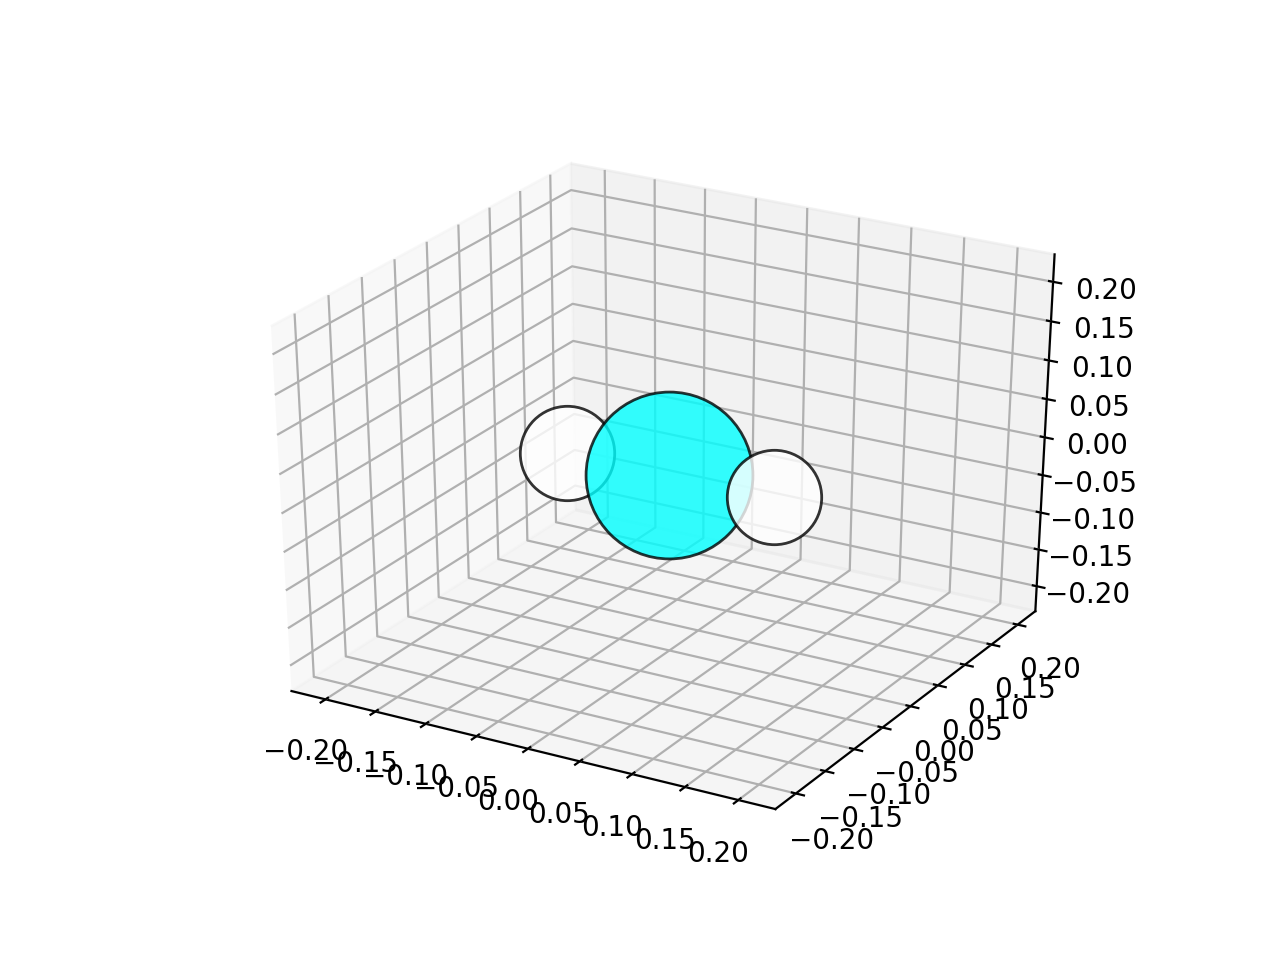

In [14]:
visualize(ch2)

Although we've added our three `Particles` to the ch2 `Compound`, we have yet to define any bonds between them. To accomplish this, we can use the `Compound.add_bond()` method to specify our two C-H bonds.

<IPython.core.display.Javascript object>


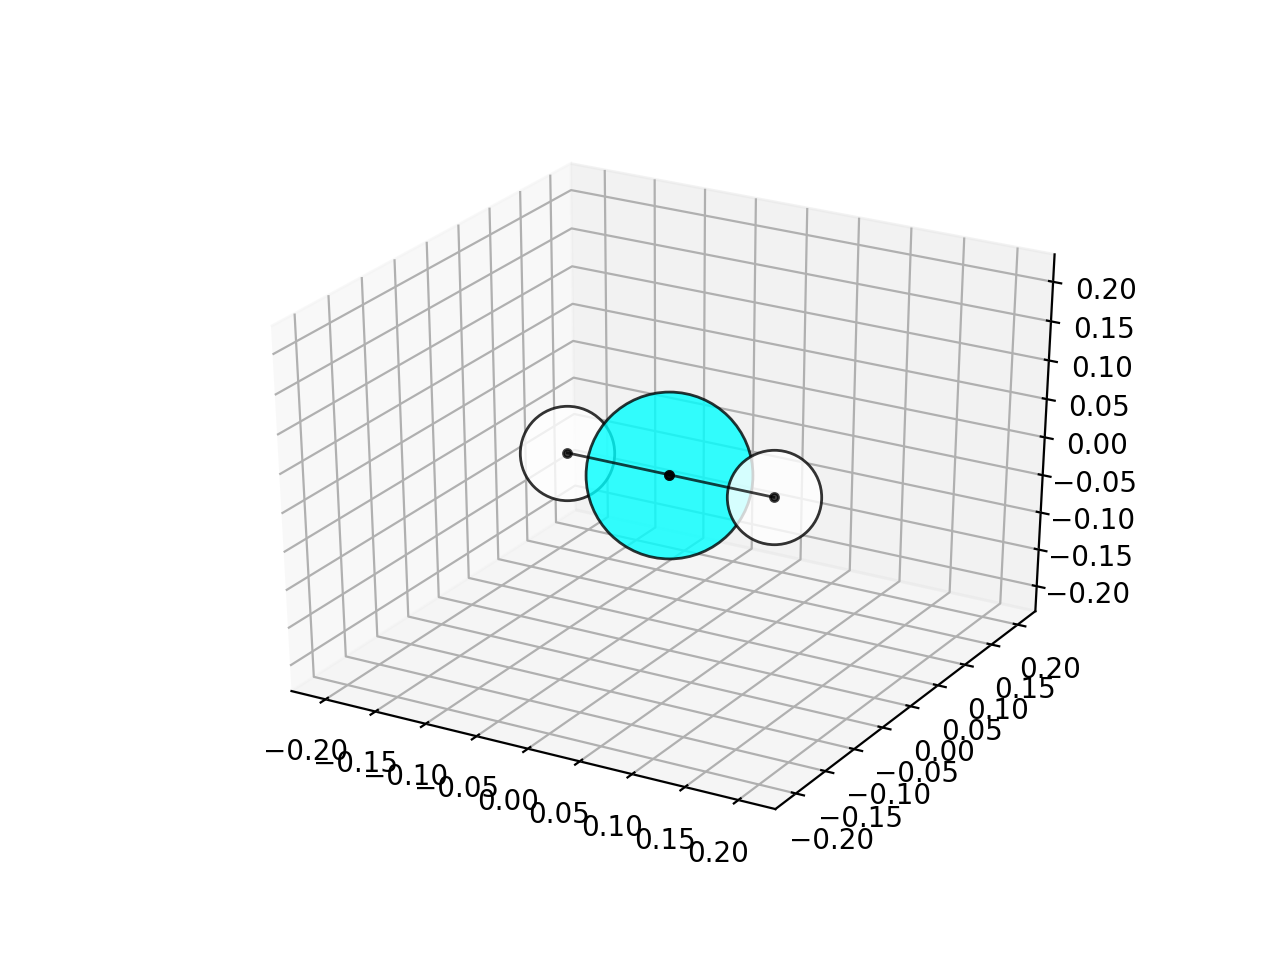

In [15]:
ch2.add_bond((carbon, hydrogen))
ch2.add_bond((carbon, hydrogen2))
visualize(ch2)

Visually, we now see that our ch2 `Compound` contains three `Particles` and two C-H bonds.

This concludes this tutorial. In the next tutorial you will learn about defining classes for reusable components.